# Exploratory Data Analysis and Model Building - Bank Marketing Campaign

# Data Description

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# What is Term Deposit

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

# Data Preparation

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [103]:
#create dataframe to read data set
data= pd.read_csv("bank-additional-full.csv", sep=";")
data=data.drop("duration",axis=1)

# Dataset Information

The data is related with direct marketing campaigns of banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [104]:
#top 5 rows for reading the dataset
data.head()  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Attribute Information

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   default        41188 non-null  object 
 5   housing        41188 non-null  object 
 6   loan           41188 non-null  object 
 7   contact        41188 non-null  object 
 8   month          41188 non-null  object 
 9   day_of_week    41188 non-null  object 
 10  campaign       41188 non-null  int64  
 11  pdays          41188 non-null  int64  
 12  previous       41188 non-null  int64  
 13  poutcome       41188 non-null  object 
 14  empvarrate     41188 non-null  float64
 15  conspriceidx   41188 non-null  float64
 16  cons.conf.idx  41188 non-null  float64
 17  euribor3m      41188 non-null  float64
 18  nr.emp

In [106]:
data.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
contact          0
month            0
day_of_week      0
campaign         0
pdays            0
previous         0
poutcome         0
empvarrate       0
conspriceidx     0
cons.conf.idx    0
euribor3m        0
nr.employed      0
y                0
dtype: int64

In [107]:
data.describe()

,age,campaign,pdays,previous,empvarrate,conspriceidx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [108]:
#categorical features.
categorical_features=[feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [109]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


Feature job and month have highest number of categorical values.

<AxesSubplot:xlabel='y', ylabel='count'>

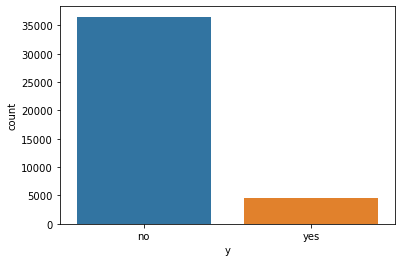

In [110]:
sns.countplot(x='y',data=data)

In [111]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

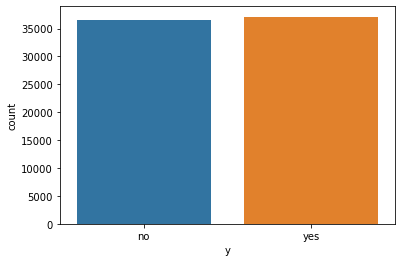

In [112]:
sns.countplot(x='y',data=data)

# Analysing the data distribution by plotting graphs for numerical fields

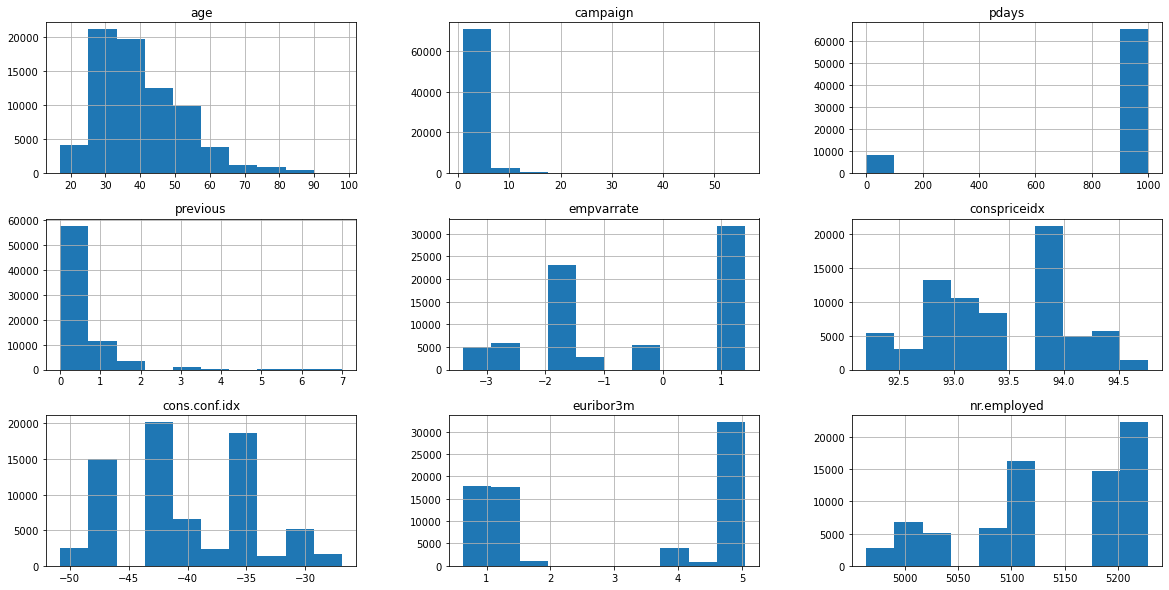

In [113]:
data.hist(figsize= [20,10])    # Histogram of all numeric columns
plt.show()

We can see that data is mot evenly distributed so we need to standardize.

# Finding categorical feature distribution

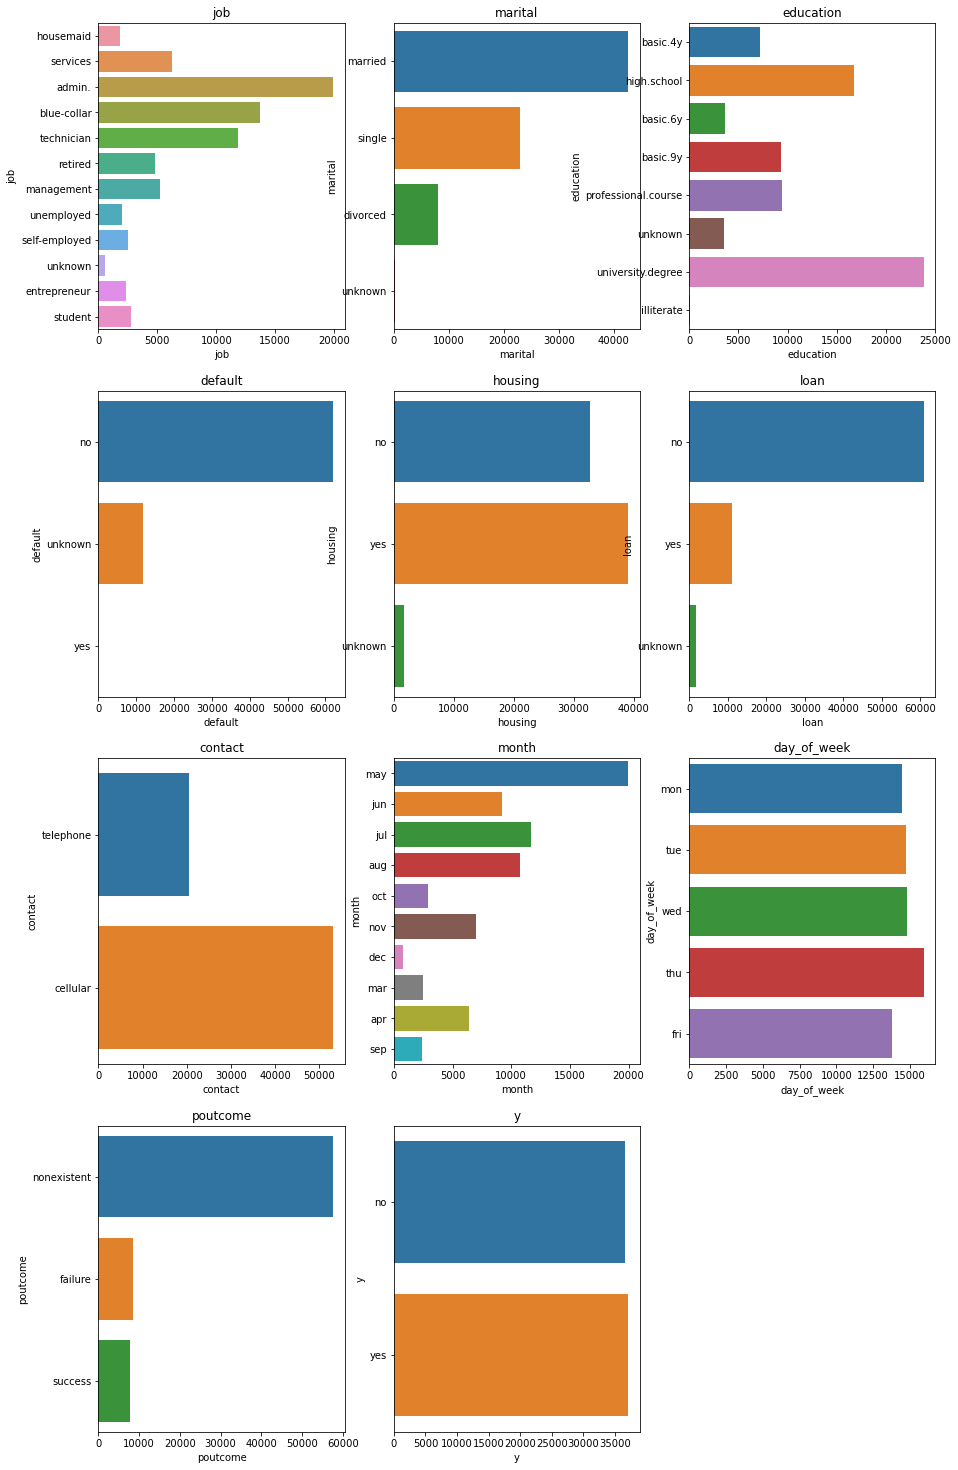

In [114]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

client with job type as admin records are high in given dataset and housemaid are very less.

client who married are high in records in given dataset and divorced are less.

client whoes education background is university degree are in high numbers in given dataset.

defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop.

data in month of may is high and less in dec.

In [159]:
data.corr()

,age,default,housing,loan,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,cons.conf.idx,euribor3m,nr.employed,pdays2
age,1.000000,-0.120728,-0.005610,0.001894,-0.004194,-0.065784,0.063335,0.032188,-0.052944,-0.019321,0.138258,-0.049467,-0.079147,0.061944
default,-0.120728,1.000000,-0.019694,-0.004783,-0.056152,-0.120479,0.131474,0.027865,-0.270982,-0.172065,0.006163,-0.269463,-0.261332,0.122454
housing,-0.005610,-0.019694,1.000000,0.040540,0.009662,0.015070,-0.018186,-0.001488,0.055806,0.063413,0.025244,0.057105,0.043724,-0.014500
loan,0.001894,-0.004783,0.040540,1.000000,-0.004475,0.008906,-0.001554,-0.004094,-0.008716,-0.007316,0.017715,-0.004961,-0.006866,-0.008060
campaign,-0.004194,-0.056152,0.009662,-0.004475,1.000000,0.092535,-0.101221,-0.015151,0.196213,0.134103,-0.030206,0.184681,0.186339,-0.092442
pdays,-0.065784,-0.120479,0.015070,0.008906,0.092535,1.000000,-0.703613,-0.662051,0.334133,0.047520,-0.156041,0.381571,0.462598,-0.986639
previous,0.063335,0.131474,-0.018186,-0.001554,-0.101221,-0.703613,1.000000,0.086761,-0.383516,-0.060013,0.077060,-0.450545,-0.524619,0.708369
poutcome,0.032188,0.027865,-0.001488,-0.004094,-0.015151,-0.662051,0.086761,1.000000,-0.005992,0.117778,0.125303,-0.034917,-0.110094,0.650044
empvarrate,-0.052944,-0.270982,0.055806,-0.008716,0.196213,0.334133,-0.383516,-0.005992,1.000000,0.719980,-0.065909,0.958520,0.868608,-0.334367
conspriceidx,-0.019321,-0.172065,0.063413,-0.007316,0.134103,0.047520,-0.060013,0.117778,0.719980,1.000000,-0.162567,0.570814,0.349286,-0.037191


<AxesSubplot:>

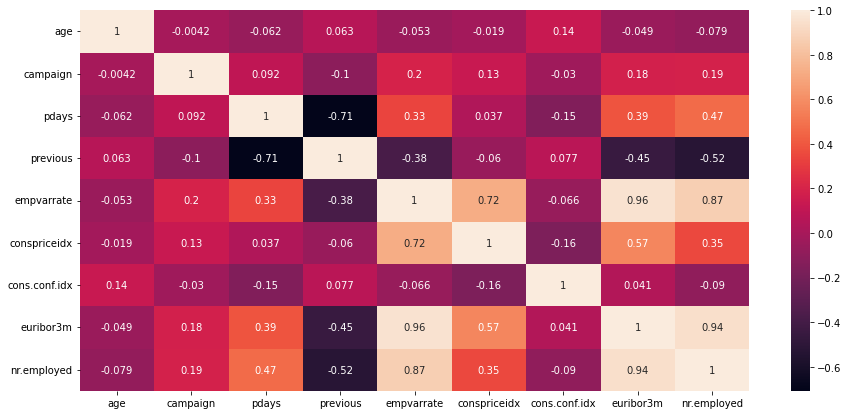

In [115]:
## Checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [116]:
#creating a new column named "pdays2" based on the value in "pdays" column 

def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 

def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int

data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,empvarrate,conspriceidx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [117]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'empvarrate', 'conspriceidx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [118]:
#standard scaling on numeric values
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [119]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,empvarrate,conspriceidx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0


In [120]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

Job, maritial, education, contact, month, day_of_week are Nominal variables

In [121]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [122]:
dataProcessed.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'empvarrate', 'conspriceidx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'pdays2', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', '

In [123]:
dataProcessed.to_csv(r"full_ohe.csv", index=False)

Finally data is encoded

# Now lets compare the performance of various models on this data

# Applying Logistic Regression with linear and polynomial features

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [125]:
data1 = pd.read_csv("full_ohe.csv")
data1.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [126]:
data1.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'empvarrate', 'conspriceidx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'pdays2', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', '

In [132]:
# Seperating features and result vectors(raw data)
X = data1.drop('y', axis=1).values
X

array([[ 0.48148148,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49382716,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24691358,  1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24691358,  1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69135802,  1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [133]:
y = data1['y'].values 
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Test-Train Split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [174]:
print('Shape of x_train: ',X_train.shape)
print('Shape of x_test: ',X_test.shape)

print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of x_train:  (51567, 55)
Shape of x_test:  (22101, 55)
Shape of y_train:  (51567,)
Shape of y_test:  (22101,)


In [135]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)

In [136]:
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)

# Function for Confusion Matrix

In [185]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
def plot_confusion_matrix(y_test,y_pred,model):
    cm = confusion_matrix(y_test,y_pred)
    conf_matrix = pd.DataFrame(data = cm, columns =  ['Predicted:0','Predicted:1'],
                              index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix,annot = True,fmt = 'd', cmap = ListedColormap('lightskyblue'),
                cbar = False,linewidth = 0.1,annot_kws = {'size':25})
    plt.show()

In [137]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

C:\Users\swati\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

C:\Users\swati\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


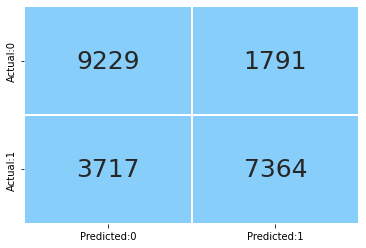

In [192]:
plot_confusion_matrix(y_test,y_test_predict,logisticRegr)

In [139]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2]})

table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2
0,Accuracy,0.742591,0.750781
1,Precision,0.639924,0.664561
2,Recall,0.806712,0.804369
3,F1 Score,0.713703,0.727812


# RandomForest Classifier

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
data1 = pd.read_csv("full_ohe.csv")
data1.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,empvarrate,conspriceidx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1.0,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [142]:
#raw data
#separating features and result vector.
X = data1.drop('y', axis=1).values
y = data1['y'].values
X.shape,y.shape

((73668, 55), (73668,))

# Test- Train Split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [204]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
predict = rfc.predict(X_test)

In [206]:
acc = metrics.accuracy_score(predict, y_test)
pre = metrics.precision_score(predict, y_test)
rec = metrics.recall_score(predict, y_test)
f1 = metrics.f1_score(predict, y_test)

Printing classification Report

In [207]:
 from sklearn.metrics import classification_report
print('RandomForestClassifier Report:\n')
print(classification_report(y_test,predict))
print('Accuracy of RandomForestClassifier is: {}'.format(acc))

RandomForestClassifier Report:

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11020
           1       0.93      1.00      0.96     11081

    accuracy                           0.96     22101
   macro avg       0.96      0.96      0.96     22101
weighted avg       0.96      0.96      0.96     22101

Accuracy of RandomForestClassifier is: 0.9595493416587485


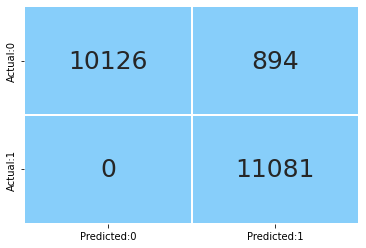

In [209]:
plot_confusion_matrix(y_test,predict,rfc)

# DecisionTree Classifier

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [150]:
# Test set prediction
dtc_predict = dtc.predict(x_test)

In [195]:
dtc_predict_prob = dtc.predict_proba(x_test)[:,1]

In [151]:
# Evaluating predictions
from sklearn.metrics import confusion_matrix
dtc_accuracy = metrics.accuracy_score(y_test, dtc_predict)
dtc_cm = confusion_matrix(y_test, dtc_predict)

In [152]:
# Printing classification report 
from sklearn.metrics import classification_report
print('DecisionTreeClassifier Report:\n')
print(classification_report(y_test, dtc_predict))
print('Accuracy of DecisionTreeClassifier is: {}'.format(dtc_accuracy))

DecisionTreeClassifier Report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     11020
           1       0.89      1.00      0.94     11081

    accuracy                           0.94     22101
   macro avg       0.94      0.94      0.93     22101
weighted avg       0.94      0.94      0.93     22101

Accuracy of DecisionTreeClassifier is: 0.9352065517397403


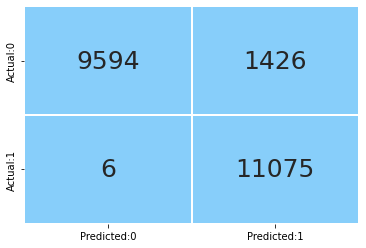

In [184]:
plot_confusion_matrix(y_test,dtc_predict,dtc)

In [153]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score


In [154]:
y_score1 = dtc.predict_proba(X_test)[:,1]
y_score2 = rfc.predict_proba(X_test)[:,1]

In [155]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

In [156]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for randomForest: ', roc_auc_score(y_test, y_score2))

roc_auc_score for DecisionTree:  0.9372632984207528
roc_auc_score for randomForest:  0.9949424883357674


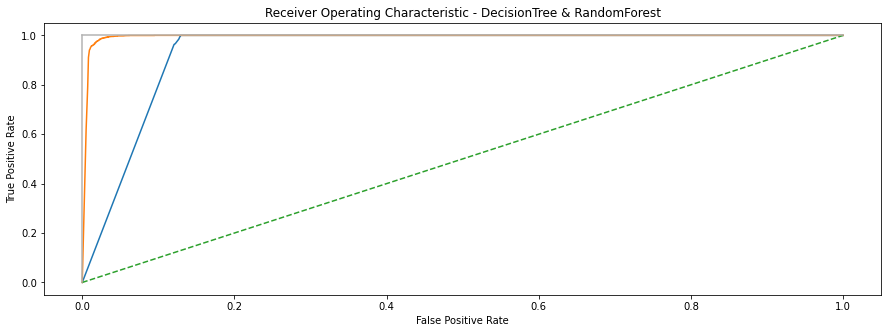

In [197]:
plt.subplots(1, figsize=(15,5))
plt.title('Receiver Operating Characteristic - DecisionTree & RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()